In [7]:
#-*-coding:utf-8-*-
import sys
import os
from pprint import pprint
import codecs
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
def wc_from_text(str, fn):
    '''根据字符串进行统计，并生成词云图'''
    wc = WordCloud(
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    ).generate(s)
    plt.imshow(wc)  # 绘制图片
    plt.axis("off")  # 消除坐标轴
    plt.show()  # 展示图片
    wc.to_file(fn)  # 保存图片

In [11]:
def wc_from_word_count(word_count, fp):
    '''根据词频字典生成词云图'''
    wc = WordCloud(
        max_words=500,  # 最多显示词数
        # max_font_size=100,  # 字体最大值
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    )
    wc.generate_from_frequencies(word_count)  # 从字典生成词云
    plt.imshow(wc)  # 显示词云
    plt.axis('off')  # 关闭坐标轴
    plt.show()  # 显示图像
    wc.to_file(fp)  # 保存图片

In [12]:
def generate_dict_from_file(fp):
    with codecs.open(fp, 'r', 'utf-8') as source_file:
        for line in source_file:
            dic = json.loads(line)
            yield dic

In [13]:
def main(data_fp, pic_fp):
    word_count = defaultdict(lambda: 0)
    for dic in generate_dict_from_file(data_fp):
        words = dic['content'].split(' ')
        for word in words:
        	word_count[word] += 1
    with codecs.open(path + 'word_count.json', 'w', 'utf-8') as f:
        json.dump(word_count, f, ensure_ascii=False)
    wc_from_word_count(word_count, pic_fp)

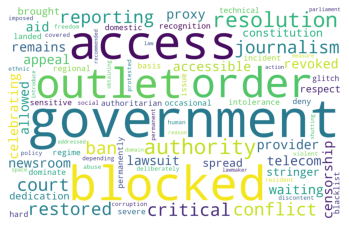

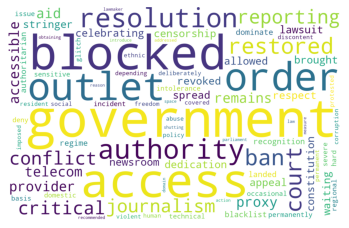

In [17]:
if __name__ == '__main__':
    s = 'access restored ban remains blocked government order accessible aid proxy provider telecom restored access celebrating government revoked censorship order newsroom waiting appeal court lawsuit government allowed constitution reporting stringer spread dedication journalism critical reporting brought outlet respect recognition landed blacklist authoritarian regime dominate permanently blocked severe intolerance critical journalism authority deny domestic access occasional basis regional outlet sensitive issue incident hard technical glitch deliberately blocked access depending covered government corruption human abuse social discontent policy freedom protested blocked violent conflict ethnic resident authority imposed permanent ban parliament resolution lawmaker addressed conflict recommended action government resolution reason obtaining court order law shutting outlet introduce measure domain space resolution authority'
    wc_from_text(s, 'wc1.jpg')
    word_count = Counter(s.split(' '))
    wc_from_word_count(word_count, 'wc2.jpg')
#     data_fp = path + 'result.json'
#     pic_fp = path + 'word_cloud_uz.jpg'
#     main(data_fp, pic_fp)